First, we import the packages we need, import data, and print data info/descriptions.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
from fuzzywuzzy import fuzz
import missingno as msno
from datetime import datetime

In [48]:
df = pd.read_csv('Nashville_housing_data_2013_2016.csv')
dfmortgage = pd.read_csv('Mortgage Rates.csv')
dfwage = pd.read_csv('Hourly Wages.csv')
dfUSunemploy = pd.read_excel('US unemployment rates.xls', sheet_name='new')
dfNashunemploy = pd.read_excel('Nashville unemployment rates.xls', sheet_name='new')

In [49]:
pd.set_option('display.max_columns', 50)
df.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         56636 non-null  int64  
 1   Unnamed: 0.1                       56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

In [51]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,56636.00000,56636.00000,5.663600e+04,26017.000000,26017.000000,2.601700e+04,2.601700e+04,2.601700e+04,24166.000000,24165.000000,24159.000000,24277.000000,24146.000000
mean,28317.50000,28317.50000,3.272111e+05,0.498903,4356.215782,6.907267e+04,1.608025e+05,2.323971e+05,1926.954345,1963.749224,3.090029,1.886106,0.283981
std,16349.54926,16349.54926,9.287425e+05,1.570396,2170.348270,1.060405e+05,2.068041e+05,2.810703e+05,1687.017313,26.546141,0.852942,0.961572,0.487905
min,0.00000,0.00000,5.000000e+01,0.010000,107.000000,1.000000e+02,0.000000e+00,1.000000e+02,0.000000,1799.000000,0.000000,0.000000,0.000000
25%,14158.75000,14158.75000,1.350000e+05,0.180000,3126.000000,2.100000e+04,7.590000e+04,1.028000e+05,1239.000000,1948.000000,3.000000,1.000000,0.000000
50%,28317.50000,28317.50000,2.054500e+05,0.270000,3929.000000,2.880000e+04,1.114000e+05,1.485000e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
75%,42476.25000,42476.25000,3.290000e+05,0.450000,6228.000000,6.000000e+04,1.807000e+05,2.685000e+05,2212.000000,1983.000000,3.000000,2.000000,1.000000
max,56635.00000,56635.00000,5.427806e+07,160.060000,9530.000000,2.772000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


In [52]:
profile_report = df.profile_report(html={'style': {'full_width': True}})
profile_report.to_file("report1.html")

Summarize dataset:   0%|          | 0/44 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Based on infromation about the data and the report generated by pandas_profiling, we see that some variables' types need to be updated right away. We may need to do this for some other variables later on as well.

In [53]:
CAT_vars =['Land Use', 'Neighborhood', 'Foundation Type', 'Exterior Wall', 'Grade']
for var in CAT_vars:
    df[var] = df[var].astype('category')

In [54]:
Bool_vars =['Sold As Vacant', 'Multiple Parcels Involved in Sale']
for var in Bool_vars:
    df[var] = df[var].map(dict(Yes=1, No=0))
    df[var] = df[var].astype('boolean')

In [55]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         56636 non-null  int64         
 1   Unnamed: 0.1                       56636 non-null  int64         
 2   Parcel ID                          56636 non-null  object        
 3   Land Use                           56636 non-null  category      
 4   Property Address                   56477 non-null  object        
 5   Suite/ Condo   #                   6109 non-null   object        
 6   Property City                      56477 non-null  object        
 7   Sale Date                          56636 non-null  datetime64[ns]
 8   Sale Price                         56636 non-null  int64         
 9   Legal Reference                    56636 non-null  object        
 10  Sold As Vacant                    

We then drop the columns that do not contain any information or do not add information to the analysis.

In [57]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

We see that there are four columns associated with pricing including: Sale Price, Land Value, Building Value, Total Value. Total Value shoud be the summation of Land Value and Building Value. So we first check that:

In [58]:
df['temp'] = df['Land Value'] + df['Building Value'] - df['Total Value']
df[(df.temp != 0) & (~df.temp.isna())]

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,temp
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,False,False,"STINSON, LAURA M.",1802 STEWART PL,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,-1900.0
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,False,False,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,-1700.0
5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,2013-01-04,93736,20130118-0006110,False,False,"MILLER, JORDAN",2626 FOSTER AVE,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\134000\656001.JPG,25000.0,86100.0,113300.0,1037.00,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,-2200.0
7,119 13 0 183.00,SINGLE FAMILY,501 MORTON AVE,NaN,NASHVILLE,2013-01-15,44000,20130115-0004888,False,False,"MICKLER, PATRICK L. & LOIS J. & ARNETT, RYAN D.",501 MORTON AVE,NASHVILLE,TN,0.20,URBAN SERVICES DISTRICT,3179.0,\136000\266001.JPG,16000.0,68100.0,84300.0,1216.00,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0,-200.0
8,119 13 0 183.00,SINGLE FAMILY,501 MORTON AVE,NaN,NASHVILLE,2013-01-25,49900,20130128-0008950,False,False,"MICKLER, PATRICK L. & LOIS J. & ARNETT, RYAN D.",501 MORTON AVE,NASHVILLE,TN,0.20,URBAN SERVICES DISTRICT,3179.0,\136000\266001.JPG,16000.0,68100.0,84300.0,1216.00,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0,-200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56547,163 01 0 014.00,SINGLE FAMILY,4240 KEVINWOOD CT,NaN,ANTIOCH,2016-10-14,67700,20161019-0110710,False,False,"TOVAR, SUNEM",4240 KEVINWOOD CT,ANTIOCH,TN,0.49,URBAN SERVICES DISTRICT,4271.0,\193000\80001.JPG,22500.0,95600.0,121000.0,1486.75,CRAWL,1999.0,FRAME,C,3.0,3.0,0.0,-2900.0
56587,165 13 0 021.00,SINGLE FAMILY,904 STONEVIEW CT,NaN,ANTIOCH,2016-10-31,165000,20161104-0116771,False,False,"CARRANZA, JOSE ANTONIO LOPEZ",904 STONEVIEW CT,ANTIOCH,TN,0.24,URBAN SERVICES DISTRICT,6328.0,\194000\62001.JPG,22000.0,74500.0,99700.0,1311.00,SLAB,1992.0,FRAME,C,3.0,2.0,0.0,-3200.0
56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NaN,NASHVILLE,2016-10-28,466000,20161102-0115988,False,False,"GLAUS, WILLIAM D. SR.",1625 5TH AVE N,NASHVILLE,TN,0.15,URBAN SERVICES DISTRICT,126.0,\66000\843001.JPG,40000.0,204100.0,256000.0,1637.00,CRAWL,2004.0,FRAME,B,3.0,2.0,1.0,-11900.0
56615,082 05 0 058.00,SINGLE FAMILY,1614 5TH AVE N,NaN,NASHVILLE,2016-10-26,685000,20161101-0115366,False,False,"DUNN, JEFFREY J. & HOWE, TRICIA L.",1614 5TH AVE N,NASHVILLE,TN,0.19,URBAN SERVICES DISTRICT,126.0,\66000\861001.JPG,40000.0,295900.0,351600.0,2478.00,CRAWL,2005.0,FRAME,B,4.0,3.0,1.0,-15700.0


We see that there are 7165 records where total value is not the same as building price plus land value. We then check if sale price is the same as total value. We also check if sale price might be the same as building value plus land value.

In [59]:
df['temp'] = df['Sale Price'] - df['Total Value']
print(df[(df.temp == 0) & (~df.temp.isna())].shape[0])
df['temp'] = df['Sale Price'] - df['Total Value']
print(df[(df.temp > 0) & (~df.temp.isna())].shape[0])
df['temp'] = df['Sale Price'] - df['Total Value']
print(df[(df.temp < 0) & (~df.temp.isna())].shape[0])
df['temp'] = df['Sale Price'] - df['Land Value'] - df['Building Value']
print(df[(df.temp == 0) & (~df.temp.isna())].shape[0])
df['temp'] = df['Land Value'] + df['Building Value'] - df['Total Value']
print(df[(df.temp > 0) & (~df.temp.isna())].shape[0])
df['temp'] = df['Land Value'] + df['Building Value'] - df['Total Value']
print(df[(df.temp < 0) & (~df.temp.isna())].shape[0])
print(df.temp.min())
df = df.drop(['temp'],axis=1)

55
19533
6429
51
0
7165
-582200.0


There are only 55 rows where sale price and total value are the same. Neither sale price nor total value are consistently greter than one another. This indicates that total value must be an estimation of the value of a home, and it does not necessarily resonate with how much a home might sell in a free market. Moreover, building value and land value do not add up to total value for more than 7000 rows, and they add up to sale price for only 51 homes. However, building value plus land value is consistently lower than or equal to total value and the maximum difference is nearly $582k. This indicates that, if there are not errors in data, sometimes there should be another factor contributing to total value of a home besides its land value and building value. We keep all these columns for further analysis in the next steps.

We see that there is a column named Address and a column named Property Address. We check if these are the same:

In [60]:
cond = (df['Address'] != df['Property Address']) & (~df['Address'].isna()) & (~df['Property Address'].isna())
print(df[cond].shape[0])

cond = (df['Address'].str.replace(' ', '') != df['Property Address'].str.replace(' ', '')) \
& (~df['Address'].isna()) & (~df['Property Address'].isna())
print(df[cond].shape[0])

a = df[cond]['Address']
b = df[cond]['Property Address']
c = df[cond][['Address','Property Address']].apply(lambda row: fuzz.WRatio(row['Address'], row['Property Address']), axis=1)
dfscore = pd.DataFrame({'Address':a, 'Property Address':b, 'Score':c})
dfscore.sort_values('Score',inplace=True)
dfscore.head(30)

5078
240


,Address,Property Address,Score
34395,0 STOKESMONT RD,GRAYBAR LN,17
9716,501 HOLLY HILL CT,7112 PATTEN LN,24
21341,829 BIXLER AVE,336 ANDERSON LN,32
29517,829 BIXLER AVE,336 ANDERSON LN,32
12293,953 BATTERY LN,107 LORING CT,35
44413,2858 MURFREESBORO PIKE,0 FOREST VIEW DR,35
6207,2310 RADER RIDGE RD,5000 COUNTRYSIDE DR,35
15770,2215 ELLIOTT DR,203 24TH ST,36
27108,301 ESTBURY CT,1316 BEDDINGTON PARK,39
5370,3201 TREVOR ST,602 33RD AVE N,40


There are 5078 rows where property address and address columns are not exactly the same. However, when empty spaces are removed, there are only 240 different rows. WRatio values from fuzzywuzzy package show that some of these addres pairs are very similar. A quick search of the low scoring address pairs on Google Maps showed that these addresses should belong to the same property located on the corner of two different streets/avenues/lanes etc., at least for most of the time. Thus, only the row associated with a score of 17 is dropped (neither of the two addresses include street number) and the other rows of the dataframe are kept for now.

In [61]:
df = df[df['Property Address'] != 'GRAYBAR LN']
df.reset_index(drop=True, inplace=True)
df.shape

(56635, 29)

Since Address column has many more missing values than Property Address column, we decide to drop the Address column. However, we first check if there are any rows where property address is missing but there is an address.

In [62]:
cond = (~df['Address'].isna()) & (df['Property Address'].isna())
df[cond]

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
43847,116 04 0 118.00,SINGLE FAMILY,NaN,NaN,NaN,2016-02-04,465000,20160205-0011565,False,False,NaN,704 CRESCENT RD,NASHVILLE,TN,0.32,URBAN SERVICES DISTRICT,3227.0,\123000\992001.JPG,220000.0,501100.0,721100.0,4420.0,CRAWL,2016.0,BRICK/FRAME,B,5.0,4.0,1.0
44210,072 15 0 176.00,SINGLE FAMILY,NaN,NaN,NaN,2016-02-24,179900,20160229-0018961,False,False,NaN,1622 PORTER AVE,NASHVILLE,TN,0.16,URBAN SERVICES DISTRICT,3627.0,\53000\387001.JPG,25000.0,283100.0,308100.0,2414.0,CRAWL,2016.0,FRAME,B,4.0,2.0,1.0


There are two rows with an address where property address is missing. We assign the address to property address for these rows and drop Address column.

In [63]:
df.iloc[43847,2] = df.iloc[43847,11]
df.iloc[44210,2] = df.iloc[44210,11]
df.drop(['Address'], axis=1, inplace=True)
df.head()

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,False,False,"STINSON, LAURA M.",NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,False,False,"NUNES, JARED R.",NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,False,False,"WHITFORD, KAREN",NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,False,False,"HENDERSON, JAMES P. & LYNN P.",NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


We then check if there are any duplicate property addresses and whether adding the suite/condo # can address some of these duplicates.

In [64]:
print(df['Property Address'].duplicated().sum())
cond = (~df['Property Address'].isna()) & (~df['Suite/ Condo   #'].isna())
print(df[['Property Address','Suite/ Condo   #']][cond])

11566
            Property Address Suite/ Condo   #
0            1208  3RD AVE S                8
17           370  WALLACE RD             C-10
35     641  OLD HICKORY BLVD              144
36     641  OLD HICKORY BLVD              403
37     601  OLD HICKORY BLVD               18
...                      ...              ...
56630        320 11TH  AVE S            274.0
56631        700 12TH  AVE S            608.0
56632        700 12TH  AVE S            613.0
56633        700 12TH  AVE S            708.0
56634        700 12TH  AVE S           1008.0

[6109 rows x 2 columns]


There are 11,566 duplicate property addresses and adding the suite/condo # can help with some of them. We first check if the suite/condo # is already included in the property address, and if not, we add that to the address and drop suite/condo # column.

In [65]:
a = df[['Property Address','Suite/ Condo   #']].apply(lambda row: re.findall(str(row['Suite/ Condo   #']), str(row['Property Address'])), axis=1)
b = df['Property Address']
c = df['Suite/ Condo   #']
dftemp = pd.DataFrame({'temp':a,'Property Address':b, 'Suite/ Condo #':c})
cond_temp = dftemp['temp'].str.len() > 0
dftemp = dftemp[['Property Address','Suite/ Condo #']][cond_temp]
print(dftemp.shape)
dftemp.tail()

(333, 2)


,Property Address,Suite/ Condo #
55478,8047 BIENVILLE DR,7
55479,8045 BIENVILLE DR,4
55584,6813 CHARLOTTE PIKE,6
55587,6813 CHARLOTTE PIKE,3
55589,6813 CHARLOTTE PIKE,1


In [66]:
a = df[['Property Address','Suite/ Condo   #']].apply(lambda row: re.findall(str(row['Suite/ Condo   #']), str(row['Property Address'])), axis=1)
b = df['Property Address']
c = df['Suite/ Condo   #']
dftemp = pd.DataFrame({'temp':a,'Property Address':b, 'Suite/ Condo #':c})
cond_temp = dftemp['temp'].str.len() > 0
dftemp = dftemp[['Property Address','Suite/ Condo #']][cond_temp]
print(dftemp.shape)

a = df[['Property Address','Suite/ Condo   #']].apply(lambda row: re.findall(' ' + str(row['Suite/ Condo   #']) + ' ', str(row['Property Address'])), axis=1)
b = df['Property Address']
c = df['Suite/ Condo   #']
dftemp2 = pd.DataFrame({'temp':a,'Property Address':b, 'Suite/ Condo #':c})
cond_temp2 = dftemp2['temp'].str.len() > 0
dftemp2 = dftemp2[['Property Address','Suite/ Condo #']][cond_temp2]
print(dftemp2.shape)

(333, 2)
(0, 2)


In [67]:
a = df['Suite/ Condo   #'] + ' - ' + df['Property Address']
test = 0
for i in df[cond].index:
    df.iloc[i,2] = a[i]
df = df.drop(['Suite/ Condo   #'],axis=1)
df.head()

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,105 03 0D 008.00,RESIDENTIAL CONDO,8 - 1208 3RD AVE S,NASHVILLE,2013-01-24,132000,20130128-0008725,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,191500,20130118-0006337,False,False,"STINSON, LAURA M.",NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,202000,20130124-0008033,False,False,"NUNES, JARED R.",NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,32000,20130128-0008863,False,False,"WHITFORD, KAREN",NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,102000,20130131-0009929,False,False,"HENDERSON, JAMES P. & LYNN P.",NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [68]:
print(df.duplicated().sum())
print(df['Property Address'].duplicated().sum())
print(df.duplicated(subset=['Property Address','Sale Date']).sum())
print(df['Property Address'].isna().sum())
a = df.duplicated(subset=['Property Address','Sale Date'], keep=False)
df[['Property Address','Sale Date']][a].sort_values(['Property Address','Sale Date'])

103
6454
694
157


,Property Address,Sale Date
54156,0,2016-09-12
54157,0,2016-09-12
55917,0,2016-10-25
55918,0,2016-10-25
37565,0 35TH AVE N,2015-09-29
...,...,...
40780,NaN,2015-11-24
41246,NaN,2015-12-07
41247,NaN,2015-12-07
41253,NaN,2015-12-07


There are still 6,454 duplicate addresses. However, when combined with Sale Date, there are only 694 duplicates. This indicates that there must be some homes with more than one sale record in the data. Another observation is that some of the duplicates are associated with NaNs, as there are 157 missing property addresses, and they are not actual duplicates. Moreover, some missing addresses are in the form of 0 rather than NaN. There are also 103 fully duplicate rows. We first drop fully duplicate rows, trun 0s into NaNs, and then see again how many duplicates we have without considering NaNs.

In [69]:
df.drop_duplicates(inplace = True)
df.reset_index(drop=True, inplace=True)
df['Property Address'] = df['Property Address'].replace('0',np.nan)
print(df[~df['Property Address'].isna()].duplicated(subset=['Property Address','Sale Date']).sum())

533


There are still 533 duplicate property address / sale date rows. We want to add city to our subset to see if there may be duplicate addresses in different cities. The dataframe currently has a city and a property city column. We need to process and drop one of these columns.

In [70]:
print(df['City'].isna().sum())
print(df['Property City'].isna().sum())

30562
159


In [71]:
df.iloc[32116]

Parcel ID                                  172 04 0A 078.00
Land Use                                      SINGLE FAMILY
Property Address                     1452  TIMBER RIDGE CIR
Property City                                     NASHVILLE
Sale Date                               2015-06-26 00:00:00
Sale Price                                           235000
Legal Reference                            20150629-0062033
Sold As Vacant                                        False
Multiple Parcels Involved in Sale                     False
Owner Name                                              NaN
City                                                    NaN
State                                                   NaN
Acreage                                                 NaN
Tax District                                            NaN
Neighborhood                                            NaN
image                                                   NaN
Land Value                              

In [72]:
cond = (~df['Property City'].isna()) & (~df['City'].isna())
temp = df[['City','Property City']][cond].apply(lambda row: row['City'] != row['Property City'], axis=1)
temp = df[['City','Property City']][cond][temp]
print(temp)

            City Property City
32013  NASHVILLE     BRENTWOOD


Google search shows that this property is located in Brentwood, so the Property Address column is more accurate for this case.

In [73]:
cond = (df['Property City'].isna()) & (~df['City'].isna())
df[cond]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
43744,116 04 0 118.00,SINGLE FAMILY,704 CRESCENT RD,NaN,2016-02-04,465000,20160205-0011565,False,False,NaN,NASHVILLE,TN,0.32,URBAN SERVICES DISTRICT,3227.0,\123000\992001.JPG,220000.0,501100.0,721100.0,4420.0,CRAWL,2016.0,BRICK/FRAME,B,5.0,4.0,1.0
44107,072 15 0 176.00,SINGLE FAMILY,1622 PORTER AVE,NaN,2016-02-24,179900,20160229-0018961,False,False,NaN,NASHVILLE,TN,0.16,URBAN SERVICES DISTRICT,3627.0,\53000\387001.JPG,25000.0,283100.0,308100.0,2414.0,CRAWL,2016.0,FRAME,B,4.0,2.0,1.0


We see that Property City column has much fewer NaNs than City column, so we decide to drop the City column. We also see that there are no discrepancies between the two columns when they both contain data. There are two rows with NaN for property city while there is information in the City column. We assign the city for these rows to property city and drop the City column. We then check the number of duplicate addresses by including city in the address subset.

In [74]:
df.iloc[df[cond].index,3] = df.iloc[df[cond].index,10]

In [75]:
df = df.drop(['City'],axis=1)

In [76]:
print(df[~df['Property Address'].isna()].duplicated(subset=['Property Address','Sale Date','Property City']).sum())

533


We see that adding the city to the subset does not reduce the number of duplicate addresses. We check to see what are the differences in these duplicate address rows.

In [77]:
cond = df[~df['Property Address'].isna()].duplicated(subset=['Property Address','Sale Date','Property City'],keep=False)
df[~df['Property Address'].isna()][cond].head(6)

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
52,173 09 0A 072.00,SINGLE FAMILY,7722 PORTER HOUSE DR,NASHVILLE,2013-01-07,161000,20130116-0005278,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,173 09 0A 072.00,SINGLE FAMILY,7722 PORTER HOUSE DR,NASHVILLE,2013-01-07,161000,20130116-0005277,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,128 03 0A 004.00,SINGLE FAMILY,413 CEDAR FOREST DR,NASHVILLE,2013-01-14,205000,20130123-0007525,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,128 03 0A 004.00,SINGLE FAMILY,413 CEDAR FOREST DR,NASHVILLE,2013-01-14,205000,20130123-0007526,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,083 06 0 364.00,SINGLE FAMILY,511 N 17TH ST,NASHVILLE,2013-01-31,129900,20130201-0010656,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,083 06 0 365.00,VACANT RES LAND,511 N 17TH ST,NASHVILLE,2013-01-31,129900,20130201-0010656,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
temp = df.loc[:, df.columns != 'Legal Reference']
print(temp.duplicated().sum())
cond = temp.duplicated()
df = df[~cond]
print(df.shape)

64
(56468, 26)


In [79]:
cond = df[~df['Property Address'].isna()].duplicated(subset=['Property Address','Sale Date','Property City'],keep=False)
df[~df['Property Address'].isna()][cond].head(6)

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
299,083 06 0 364.00,SINGLE FAMILY,511 N 17TH ST,NASHVILLE,2013-01-31,129900,20130201-0010656,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,083 06 0 365.00,VACANT RES LAND,511 N 17TH ST,NASHVILLE,2013-01-31,129900,20130201-0010656,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2451,163 02 0B 013.00,VACANT RES LAND,148 TOOK DR,ANTIOCH,2013-04-30,30000,20130513-0047955,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2452,163 02 0B 013.00,VACANT RES LAND,148 TOOK DR,ANTIOCH,2013-04-30,22000,20130513-0047954,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2453,163 02 0B 018.00,VACANT RES LAND,208 TOOK DR,ANTIOCH,2013-04-30,22000,20130513-0047954,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2454,163 02 0B 018.00,VACANT RES LAND,208 TOOK DR,ANTIOCH,2013-04-30,30000,20130513-0047955,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df[~df['Property Address'].isna()][cond].shape

(711, 26)

We observed that some of the rows with duplicate addresses were only different in terms of their legal reference. Since legal reference is not an important factor in our modeling and will probably be droped later, we removed the duplicate rows that were only different in their legal reference. We then observed that the remaining rows with duplicate address/sale date/property city could be different in terms of their sale price, land use, etc. Since these are important factors in modeling and these rows are only a small subset of our data, we decide to drop all these rows because the discrepancies in sale price for the same property and the same date, for instance, indicate errors in data which could impact the modeling. However, we keep these rows for now because dealing with NaNs may resolve some of these duplicate rows.

We now pay attention to missing values:

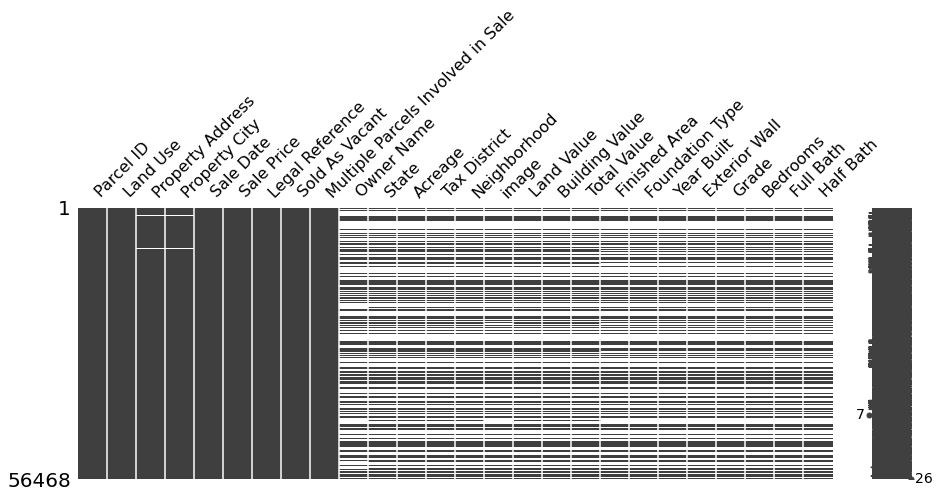

In [81]:
msno.matrix(df, figsize=(15, 5))
plt.show()

161
157


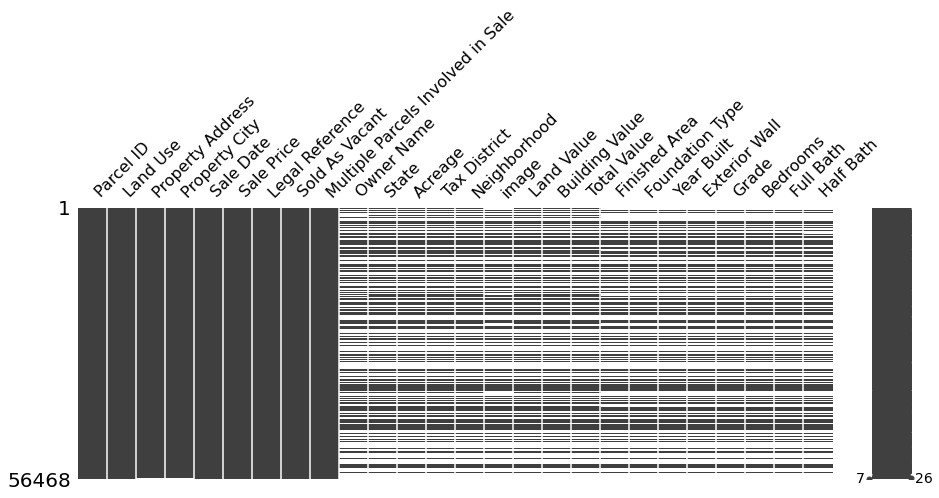

In [82]:
df1 = df.sort_values('Property Address')
print(df['Property Address'].isna().sum())
print(df['Property City'].isna().sum())
msno.matrix(df1, figsize=(15, 5))
plt.show()

We see that there are less than 200 records where property address and/or city are missing. We also see that these correspond with missing values in many other columns. So, we drop this small subset of our data.

0
0


<AxesSubplot:>

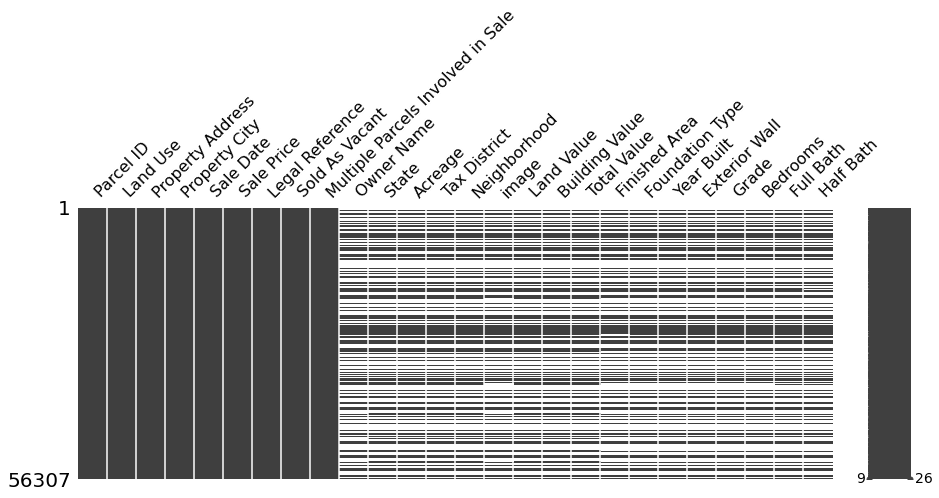

In [83]:
ind = df[df['Property Address'].isna()].index
df = df.drop(ind)
df.reset_index(drop=True, inplace=True)
print(df['Property Address'].isna().sum())
print(df['Property City'].isna().sum())
msno.matrix(df, figsize=(15, 5))

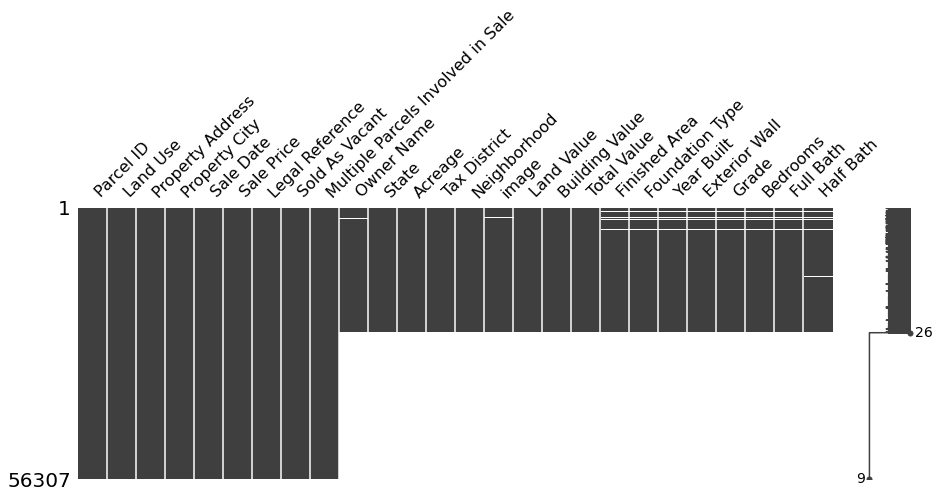

In [84]:
df1 = df.sort_values('Acreage')
msno.matrix(df1, figsize=(15, 5))
plt.show()

We then see that the majority of missing values correspond for different columns. We do not drop the rows with the chunk of missing values for now and leave them for analysis in the next stages. We however pay attention to the missing values that are separate from the chunk of missing values.

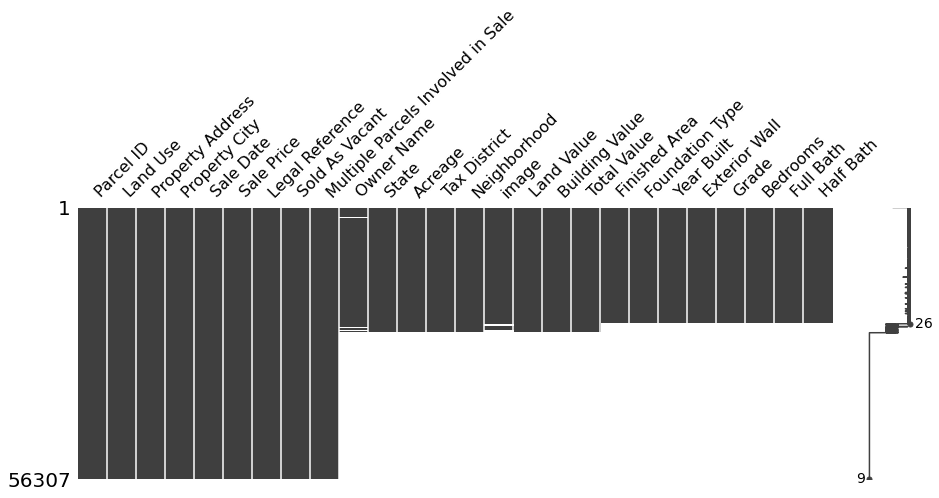

In [85]:
df1 = df.sort_values(['State','Finished Area'])
msno.matrix(df1, figsize=(15, 5))
plt.show()

We see that a considerable portion of rows are missing data on the last 8 columns. We keep these rows as well for further processing and analysis in the next stages. We also see that imagae and Owner Name columns are missing data for some additional rows. These two columns do not contain information that we will use for modeling and it is unlikely that they can help with cleaninig the data at this stage. So we drop these two columns.

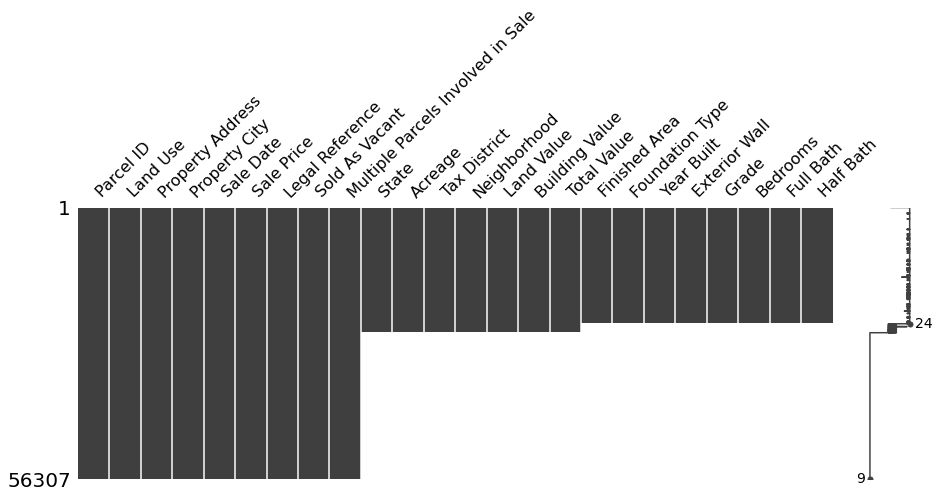

In [86]:
df = df.drop(columns = ['Owner Name', 'image'])
df1 = df.sort_values(['State','Finished Area'])
msno.matrix(df1, figsize=(15, 5))
plt.show()

Next, we analyze numerical and categorical features to see if there are out of range and/or invalid values. Some categorical variables are easy to inspect by just printing their unique values. However, we create another pandas profiling report at this stage and analyze the different categories for each categorical variable. For other variables we plot boxplots to better inspect the values.

In [87]:
profile_report = df.profile_report(html={'style': {'full_width': True}})
profile_report.to_file("report2.html")

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/pandas_profiling/model/correlations.py:146: UserWarning: There was an attempt to calculate the phi_k correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"phi_k": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'values should be boolean numpy array. Use the 'pd.array' function instead')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Inspecting Property City column reveals that there is a category 'UNKNOWN'. This should clearly be marked as NaN. However, our analysis below shows that this is associated with only one record for which a lot of data are missing. So we drop this single row.

In [88]:
df.loc[df['Property City'] == 'UNKNOWN']

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
45699,093 06 1B 618.00,RESIDENTIAL CONDO,0 5TH AVE N,UNKNOWN,2016-03-31,298000,20160404-0031713,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df = df[df['Property City'] != 'UNKNOWN']
df.reset_index(drop=True, inplace=True)

Inspecting land use categories from pandas profiling report reveals that there are a large number of nonresidential categories as well as some duplicates. We first separate residential categories to see how much of our data is associated with residential homes.

In [90]:
residential = ['RESIDENTIAL CONDO','SINGLE FAMILY', 'VACANT RES LAND', 'DUPLEX', 'CONDO', 'ZERO LOT LINE', \
   'RESIDENTIAL COMBO/MISC', 'TRIPLEX', 'QUADPLEX', 'MOBILE HOME', 'VACANT ZONED MULTI FAMILY', 'VACANT RESIDENTIAL LAND',\
  'APARTMENT: LOW RISE (BUILT SINCE 1960)', 'VACANT RESIENTIAL LAND']
df.shape[0] - df[df['Land Use'].isin(residential)].shape[0]

182

In [91]:
df.shape

(56306, 24)

We see that only a small part of our data is associated with nonresidential properties. As the goal of the project is predicting housing prices in Nashville, we drop nonresidential records. We then see that within residential land uses there are duplicate categories and some of the categories are also associated with vacant land. We first address the duplicates and then check how much of our data is associated with vacant land.

In [92]:
df = df[df['Land Use'].isin(residential)]
df.reset_index(drop=True, inplace=True)

In [93]:
df.loc[df['Land Use'].isin(['VACANT RES LAND','VACANT RESIDENTIAL LAND','VACANT RESIENTIAL LAND']),'Land Use'] \
= 'VACANT RESIENTIAL LAND'
df.loc[df['Land Use'].isin(['RESIDENTIAL CONDO', 'CONDO']),'Land Use'] = 'RESIDENTIAL CONDO'

In [94]:
df1 = df[df['Land Use'].isin(['VACANT RESIENTIAL LAND', 'VACANT ZONED MULTI FAMILY'])]
df1.shape[0]

5081

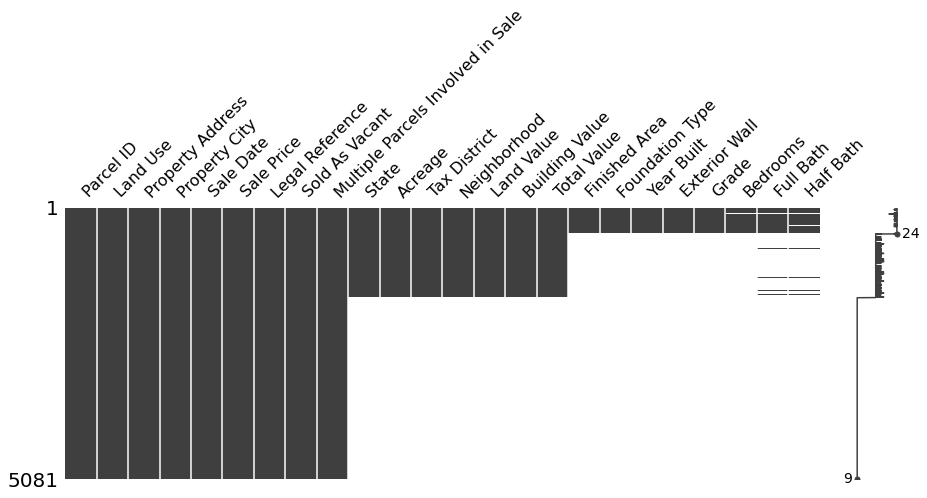

In [95]:
df1 = df1.sort_values(['State','Finished Area'])
msno.matrix(df1, figsize=(15, 5))
plt.show()

About 5000 rows are asscoiated with vacant land, and some of them even have information on number of bedrooms, bathrooms, etc. We keep these records for now. We also see below that a small number of records are in MOBILE HOME and RESIDENTIAL COMBO/MISC categories. Mobile homes may not be appropriate to be used in the analysis especially because there is a very limited number of records associated with them. It is also unclear what exactly residential combo/misc means. Resdiential combo/misc should probably be dissolved in other categories but it is not clear which category(ies) they should be assigned to. So, it may be appropriate to drop these records. We however keep all these records for now.

In [96]:
print(df[df['Land Use'] == 'MOBILE HOME'].shape[0])
print(df[df['Land Use'] == 'RESIDENTIAL COMBO/MISC'].shape[0])

20
95


We then create boxplot to analyze numerical variables better.

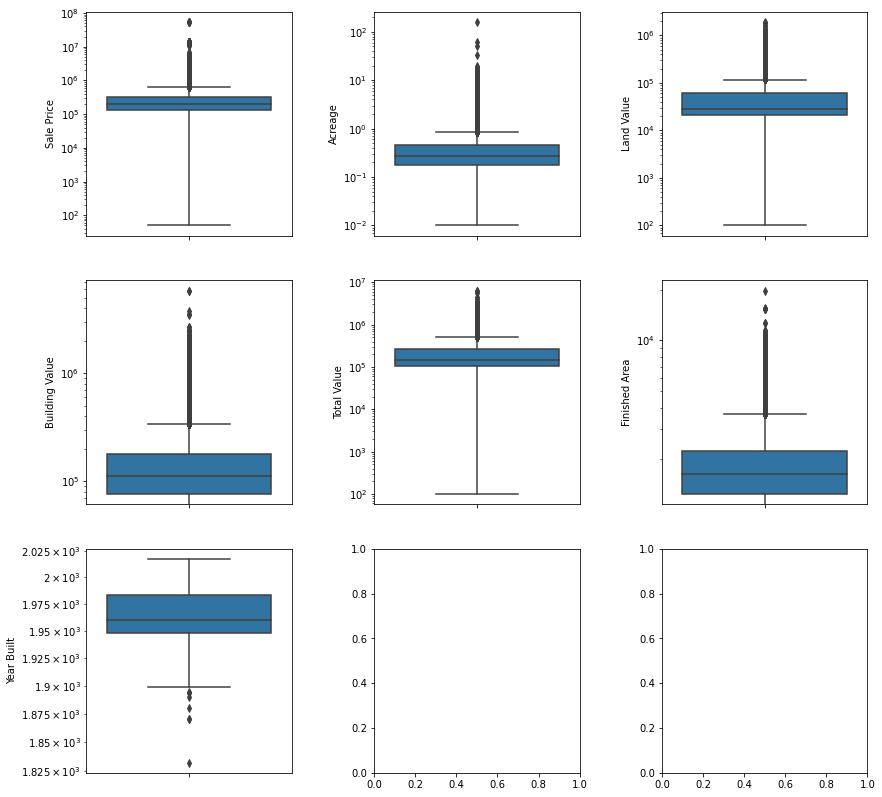

In [97]:
fig, axs = plt.subplots(3,3, figsize=(14, 14))
fig.subplots_adjust(wspace=0.4, hspace=0.2)
i = 0; j = 0
vars = ['Sale Price','Acreage','Land Value','Building Value','Total Value','Finished Area','Year Built']
for var in vars:
    sns.boxplot(ax = axs[i,j], y=var, data=df)
    axs[i,j].set(ylabel=var, yscale='log')
    j = j + 1
    if j > 2:
        i = i + 1
        j = 0

We analyze some of the outliers deeper to see if there are abnormal records.

In [98]:
df[df['Finished Area'] > 15000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
571,117 09 0 057.00,SINGLE FAMILY,2430 BEAR RD,NASHVILLE,2013-02-19,1700000,20130221-0017326,False,False,TN,1.33,URBAN SERVICES DISTRICT,3227.0,240000.0,1826100.0,2115400.0,15378.00000,PT BSMT,1948.0,BRICK,X,10.0,10.0,0.0
9591,132 06 0 036.00,SINGLE FAMILY,4225 FRANKLIN PIKE,NASHVILLE,2013-11-15,905000,20131121-0120098,False,False,TN,4.00,CITY OF OAK HILL,9527.0,520000.0,5824300.0,6402600.0,15446.00000,CRAWL,2016.0,STONE,X,5.0,5.0,2.0
22242,117 09 0 057.00,SINGLE FAMILY,2430 BEAR RD,NASHVILLE,2014-10-20,1600000,20141022-0097588,False,False,TN,1.33,URBAN SERVICES DISTRICT,3227.0,240000.0,1826100.0,2115400.0,15378.00000,PT BSMT,1948.0,BRICK,X,10.0,10.0,0.0
23603,132 06 0 036.00,SINGLE FAMILY,4225 FRANKLIN PIKE,NASHVILLE,2014-11-17,1100000,20141118-0106332,False,False,TN,4.00,CITY OF OAK HILL,9527.0,520000.0,5824300.0,6402600.0,15446.00000,CRAWL,2016.0,STONE,X,5.0,5.0,2.0
30170,092 04 0 309.00,APARTMENT: LOW RISE (BUILT SINCE 1960),1601 HERMAN ST,NASHVILLE,2015-05-07,2000000,20150508-0042350,False,True,TN,1.13,URBAN SERVICES DISTRICT,326.0,69000.0,589900.0,662400.0,15574.00000,TYPICAL,1958.0,BRICK,AAC,0.0,0.0,0.0
37523,144 00 0 012.00,SINGLE FAMILY,6123 HILLSBORO PIKE,NASHVILLE,2015-09-01,4500000,20150902-0089562,False,False,TN,3.53,CITY OF FOREST HILLS,9226.0,500400.0,3456900.0,4058100.0,19728.24988,FULL BSMT,1996.0,BRICK,X,7.0,10.0,0.0


In [99]:
df[df['Finished Area'] < 400]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
5793,043 16 0 126.00,MOBILE HOME,1230 BUBBLING WELL RD,MADISON,2013-07-12,20000,20130717-0073628,False,False,TN,0.13,GENERAL SERVICES DISTRICT,6927.0,15000.0,0.0,23000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14438,082 03 0 303.00,SINGLE FAMILY,1000 PENNOCK AVE,NASHVILLE,2014-04-30,50000,20140502-0037205,False,False,TN,0.22,URBAN SERVICES DISTRICT,2026.0,27000.0,0.0,27000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are some homes with high finished area values but at least at first glance they do not seem to be associated with errors in data. On the other hand, there are some homes with 0 as their finished area. These are clearly missing values. We address this below.

In [100]:
df.loc[df['Finished Area'] == 0, 'Finished Area'] = np.nan

In [101]:
df[df['Total Value'] > 5000000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1095,130 03 0 122.00,SINGLE FAMILY,540 JACKSON BLVD,NASHVILLE,2013-03-01,7200000,20130301-0020968,False,False,TN,7.88,CITY OF BELLE MEADE,9026.0,1830700.0,3768000.0,5697100.0,10519.29993,PT BSMT,1990.0,STONE,X,5.0,8.0,0.0
9591,132 06 0 036.00,SINGLE FAMILY,4225 FRANKLIN PIKE,NASHVILLE,2013-11-15,905000,20131121-0120098,False,False,TN,4.00,CITY OF OAK HILL,9527.0,520000.0,5824300.0,6402600.0,15446.00000,CRAWL,2016.0,STONE,X,5.0,5.0,2.0
23603,132 06 0 036.00,SINGLE FAMILY,4225 FRANKLIN PIKE,NASHVILLE,2014-11-17,1100000,20141118-0106332,False,False,TN,4.00,CITY OF OAK HILL,9527.0,520000.0,5824300.0,6402600.0,15446.00000,CRAWL,2016.0,STONE,X,5.0,5.0,2.0


In [102]:
df[df['Total Value'] < 1000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1663,092 06 0 189.00,VACANT RESIENTIAL LAND,2812 BATAVIA ST,NASHVILLE,2013-04-22,2000,20130426-0041541,True,False,TN,0.07,URBAN SERVICES DISTRICT,1129.0,600.0,0.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2743,092 02 0 195.00,VACANT RESIENTIAL LAND,2613 A ALAMEDA ST,NASHVILLE,2013-05-22,3500,20130529-0053860,True,False,TN,0.07,URBAN SERVICES DISTRICT,1129.0,600.0,0.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6274,119 03 0 081.00,VACANT RESIENTIAL LAND,118 DODGE DR,NASHVILLE,2013-08-30,114000,20130912-0096493,False,True,TN,0.06,URBAN SERVICES DISTRICT,3132.0,500.0,0.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8346,162 07 0 242.00,VACANT RESIENTIAL LAND,0 BENZING RD,ANTIOCH,2013-10-30,193890,20131104-0114356,False,True,TN,0.06,URBAN SERVICES DISTRICT,3929.0,500.0,0.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10669,032 15 0 020.00,VACANT RESIENTIAL LAND,0 DALEMERE DR,NASHVILLE,2013-12-06,169900,20131211-0125356,False,True,TN,0.34,GENERAL SERVICES DISTRICT,6828.0,200.0,0.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10722,052 01 0 330.00,VACANT RESIENTIAL LAND,324 NEELYS BEND RD,MADISON,2013-12-23,67200,20131226-0129630,False,True,TN,0.09,GENERAL SERVICES DISTRICT,6927.0,600.0,0.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15414,033 02 0 014.00,VACANT RESIENTIAL LAND,0 GENELLE DR,GOODLETTSVILLE,2014-05-09,3000,20140516-0042382,True,False,TN,0.34,GENERAL SERVICES DISTRICT,6828.0,200.0,0.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15796,149 02 0 036.00,VACANT RESIENTIAL LAND,0 UNA ANTIOCH PIKE,ANTIOCH,2014-05-12,103000,20140516-0042207,False,True,TN,0.05,URBAN SERVICES DISTRICT,6031.0,500.0,0.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17699,092 06 0 181.01,VACANT RESIENTIAL LAND,909 28TH AVE N,NASHVILLE,2014-07-11,6500,20140716-0062757,True,False,TN,0.08,URBAN SERVICES DISTRICT,1129.0,600.0,0.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24426,092 06 0 532.00,VACANT RESIENTIAL LAND,726 LENA ST,NASHVILLE,2014-12-17,82750,20141223-0117229,False,True,TN,0.08,URBAN SERVICES DISTRICT,1129.0,600.0,0.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are three homes with higher total values than 5M but they do not seem to be out of the ordinary given their specs. On the other hand, there are some homes with very low total values. These should be associated with errors in data especially given that some of these homes have much higher sale prices. We raised the issue about the relationship between sale price, total value, land value and building value before. Since we may end up dropping all these columns except sale price, we do not deal with this issue here but take a note of it.

In [103]:
df[df['Building Value'] > 5000000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
9591,132 06 0 036.00,SINGLE FAMILY,4225 FRANKLIN PIKE,NASHVILLE,2013-11-15,905000,20131121-0120098,False,False,TN,4.0,CITY OF OAK HILL,9527.0,520000.0,5824300.0,6402600.0,15446.0,CRAWL,2016.0,STONE,X,5.0,5.0,2.0
23603,132 06 0 036.00,SINGLE FAMILY,4225 FRANKLIN PIKE,NASHVILLE,2014-11-17,1100000,20141118-0106332,False,False,TN,4.0,CITY OF OAK HILL,9527.0,520000.0,5824300.0,6402600.0,15446.0,CRAWL,2016.0,STONE,X,5.0,5.0,2.0


In [104]:
df[(df['Building Value'] < 2000) & (df['Building Value'] > 0)]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
20650,092 06 0 336.00,SINGLE FAMILY,705 29TH AVE N,NASHVILLE,2014-09-02,45500,20140905-0081400,False,False,TN,0.14,URBAN SERVICES DISTRICT,1129.0,11000.0,1600.0,12600.0,792.0,CRAWL,1962.0,BRICK,D,2.0,1.0,0.0
40217,070 06 0 041.00,SINGLE FAMILY,1110 W TRINITY LN,NASHVILLE,2015-11-19,2040000,20151130-0120429,False,True,TN,3.03,URBAN SERVICES DISTRICT,3527.0,44800.0,1400.0,47000.0,480.0,PIERS,1940.0,FRAME,E,0.0,1.0,0.0


In [105]:
df[(df['Building Value'] == 0) & (df['Land Use'] != 'VACANT RESIENTIAL LAND')]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
269,071 16 0 040.00,SINGLE FAMILY,1317 JONES AVE,NASHVILLE,2013-01-08,16000,20130109-0002808,False,False,TN,0.17,URBAN SERVICES DISTRICT,3426.0,15000.0,0.0,15300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,132 06 0 043.00,SINGLE FAMILY,839 CURTISWOOD LN,NASHVILLE,2013-02-14,695000,20130219-0016158,False,False,TN,2.62,CITY OF OAK HILL,9527.0,434600.0,0.0,434600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,051 04 0 147.00,RESIDENTIAL COMBO/MISC,837 E MEADE AVE,MADISON,2013-02-12,75000,20130213-0014611,False,False,TN,0.22,GENERAL SERVICES DISTRICT,6927.0,16000.0,0.0,48100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744,094 05 0 017.00,SINGLE FAMILY,1109 OZARK ST,NASHVILLE,2013-02-25,83000,20130228-0020231,False,False,TN,0.19,URBAN SERVICES DISTRICT,2328.0,25000.0,0.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,094 05 0 115.00,SINGLE FAMILY,1111 OZARK ST,NASHVILLE,2013-02-21,87500,20130222-0017887,False,False,TN,0.21,URBAN SERVICES DISTRICT,2328.0,25000.0,0.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54154,043 12 0 016.00,MOBILE HOME,1071 N DUPONT AVE,MADISON,2016-09-26,60000,20160927-0101951,False,False,TN,0.25,GENERAL SERVICES DISTRICT,6950.0,17000.0,0.0,22300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54182,052 03 0 188.00,RESIDENTIAL COMBO/MISC,317 LARKIN SPRINGS RD,MADISON,2016-09-02,40000,20160907-0093974,False,False,TN,0.69,GENERAL SERVICES DISTRICT,6927.0,24000.0,0.0,37700.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
54235,063 02 0 007.00,RESIDENTIAL COMBO/MISC,1430 MOHAWK TRL,MADISON,2016-09-02,90000,20160920-0099064,False,True,TN,0.18,GENERAL SERVICES DISTRICT,6926.0,18000.0,0.0,19300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54401,053 11 0 078.00,RESIDENTIAL COMBO/MISC,139 PARK CIR,OLD HICKORY,2016-09-29,144000,20161005-0105513,False,False,TN,0.23,GENERAL SERVICES DISTRICT,6231.0,12000.0,0.0,19100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Building values seem more resonable than total values. However, there are building values of 0 for other land use categories than vacant residential land. We take a note of this issue for next stages.

In [106]:
df[df['Land Value'] > 1500000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1095,130 03 0 122.00,SINGLE FAMILY,540 JACKSON BLVD,NASHVILLE,2013-03-01,7200000,20130301-0020968,False,False,TN,7.88,CITY OF BELLE MEADE,9026.0,1830700.0,3768000.0,5697100.0,10519.29993,PT BSMT,1990.0,STONE,X,5.0,8.0,0.0
9641,144 06 0 040.00,VACANT RESIENTIAL LAND,4404 CHICKERING LN,NASHVILLE,2013-11-12,1000000,20131114-0117695,True,False,TN,7.37,CITY OF BELLE MEADE,9026.0,1567600.0,0.0,1567600.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
16170,188 00 0 008.00,VACANT RESIENTIAL LAND,7211 CAROTHERS RD,NOLENSVILLE,2014-06-25,3235790,20140625-0055448,False,True,TN,160.06,GENERAL SERVICES DISTRICT,4229.0,1921700.0,0.0,1921700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25777,116 06 0 010.00,SINGLE FAMILY,105 BELLE MEADE BLVD,NASHVILLE,2015-01-29,3100000,20150130-0009118,False,False,TN,6.70,CITY OF BELLE MEADE,9026.0,1869000.0,943700.0,2818700.0,7834.00000,PT BSMT,1948.0,BRICK,X,6.0,7.0,0.0
53877,144 01 0 005.00,SINGLE FAMILY,1303 CHICKERING RD,NASHVILLE,2016-09-02,5000000,20160907-0094170,False,False,TN,4.86,CITY OF BELLE MEADE,9026.0,1603800.0,640200.0,2348300.0,5167.00000,PT BSMT,1929.0,BRICK,X,6.0,4.0,0.0


In [107]:
df[df['Land Value'] < 1000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1663,092 06 0 189.00,VACANT RESIENTIAL LAND,2812 BATAVIA ST,NASHVILLE,2013-04-22,2000,20130426-0041541,True,False,TN,0.07,URBAN SERVICES DISTRICT,1129.0,600.0,0.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2743,092 02 0 195.00,VACANT RESIENTIAL LAND,2613 A ALAMEDA ST,NASHVILLE,2013-05-22,3500,20130529-0053860,True,False,TN,0.07,URBAN SERVICES DISTRICT,1129.0,600.0,0.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6274,119 03 0 081.00,VACANT RESIENTIAL LAND,118 DODGE DR,NASHVILLE,2013-08-30,114000,20130912-0096493,False,True,TN,0.06,URBAN SERVICES DISTRICT,3132.0,500.0,0.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8346,162 07 0 242.00,VACANT RESIENTIAL LAND,0 BENZING RD,ANTIOCH,2013-10-30,193890,20131104-0114356,False,True,TN,0.06,URBAN SERVICES DISTRICT,3929.0,500.0,0.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10326,081 16 0 329.00,DUPLEX,1107 14TH AVE N,NASHVILLE,2013-12-30,42400,20140121-0005609,False,False,TN,0.08,URBAN SERVICES DISTRICT,326.0,900.0,53400.0,54300.0,1147.0,CRAWL,1965.0,BRICK,D,2.0,2.0,0.0
10669,032 15 0 020.00,VACANT RESIENTIAL LAND,0 DALEMERE DR,NASHVILLE,2013-12-06,169900,20131211-0125356,False,True,TN,0.34,GENERAL SERVICES DISTRICT,6828.0,200.0,0.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10722,052 01 0 330.00,VACANT RESIENTIAL LAND,324 NEELYS BEND RD,MADISON,2013-12-23,67200,20131226-0129630,False,True,TN,0.09,GENERAL SERVICES DISTRICT,6927.0,600.0,0.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15414,033 02 0 014.00,VACANT RESIENTIAL LAND,0 GENELLE DR,GOODLETTSVILLE,2014-05-09,3000,20140516-0042382,True,False,TN,0.34,GENERAL SERVICES DISTRICT,6828.0,200.0,0.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15796,149 02 0 036.00,VACANT RESIENTIAL LAND,0 UNA ANTIOCH PIKE,ANTIOCH,2014-05-12,103000,20140516-0042207,False,True,TN,0.05,URBAN SERVICES DISTRICT,6031.0,500.0,0.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17699,092 06 0 181.01,VACANT RESIENTIAL LAND,909 28TH AVE N,NASHVILLE,2014-07-11,6500,20140716-0062757,True,False,TN,0.08,URBAN SERVICES DISTRICT,1129.0,600.0,0.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df[df['Acreage'] > 50]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
4924,163 00 0 122.00,VACANT RESIENTIAL LAND,0 BELL RD,ANTIOCH,2013-06-28,580000,20130702-0068071,True,False,TN,62.96,URBAN SERVICES DISTRICT,4287.0,944400.0,0.0,944400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16170,188 00 0 008.00,VACANT RESIENTIAL LAND,7211 CAROTHERS RD,NOLENSVILLE,2014-06-25,3235790,20140625-0055448,False,True,TN,160.06,GENERAL SERVICES DISTRICT,4229.0,1921700.0,0.0,1921700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24613,128 00 0 181.00,VACANT RESIENTIAL LAND,OLD HICKORY BLVD,NASHVILLE,2014-12-24,500000,20141230-0118976,True,False,TN,51.34,URBAN SERVICES DISTRICT,6732.0,643500.0,0.0,643500.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [109]:
df[df['Acreage'] < 0.1]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
108,104 01 0 244.00,ZERO LOT LINE,3608 NEBRASKA AVE,NASHVILLE,2013-01-11,138000,20130115-0004850,False,False,TN,0.08,URBAN SERVICES DISTRICT,2526.0,105000.0,44900.0,149900.0,810.0,CRAWL,1983.0,BRICK/FRAME,C,2.0,1.0,0.0
109,104 01 0 444.00,ZERO LOT LINE,3606 NEBRASKA AVE,NASHVILLE,2013-01-11,138000,20130115-0004852,False,False,TN,0.08,URBAN SERVICES DISTRICT,2526.0,105000.0,44900.0,149900.0,810.0,CRAWL,1983.0,BRICK/FRAME,C,2.0,1.0,0.0
211,081 15 0 489.00,SINGLE FAMILY,1710 SCOVEL ST,NASHVILLE,2013-01-08,37500,20130109-0003008,False,False,TN,0.09,URBAN SERVICES DISTRICT,226.0,13000.0,45900.0,64500.0,1057.0,CRAWL,1935.0,BRICK/FRAME,D,1.0,1.0,0.0
639,081 07 0 021.00,SINGLE FAMILY,2107 18TH AVE N,NASHVILLE,2013-02-13,42500,20130221-0017507,False,False,TN,0.07,URBAN SERVICES DISTRICT,3326.0,11000.0,70800.0,81800.0,1134.0,CRAWL,2010.0,FRAME,C,3.0,1.0,0.0
650,091 11 0 090.00,SINGLE FAMILY,4703 ILLINOIS AVE,NASHVILLE,2013-02-13,229900,20130214-0015295,False,False,TN,0.06,URBAN SERVICES DISTRICT,1226.0,50000.0,180500.0,234300.0,1680.0,CRAWL,2012.0,FRAME,C,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55726,082 07 0 191.00,ZERO LOT LINE,733 JOSEPH AVE,NASHVILLE,2016-10-06,215000,20161011-0107278,False,False,TN,0.05,URBAN SERVICES DISTRICT,2026.0,20000.0,26700.0,46700.0,1102.0,CRAWL,1963.0,BRICK,C,3.0,1.0,1.0
55727,082 07 0 238.00,ZERO LOT LINE,619 BN 2ND ST,NASHVILLE,2016-10-04,174000,20161006-0105665,False,False,TN,0.08,URBAN SERVICES DISTRICT,2026.0,10000.0,77300.0,87300.0,960.0,CRAWL,1987.0,BRICK/FRAME,C,2.0,1.0,1.0
55771,094 02 0 212.00,VACANT RESIENTIAL LAND,603 S 20TH ST,NASHVILLE,2016-10-13,170000,20161019-0110586,True,False,TN,0.09,URBAN SERVICES DISTRICT,2328.0,3000.0,0.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55782,044 15 0 233.00,SINGLE FAMILY,1015 BRYAN ST,OLD HICKORY,2016-10-12,126000,20161018-0110162,False,False,TN,0.09,GENERAL SERVICES DISTRICT,6226.0,17000.0,81200.0,98200.0,1101.0,CRAWL,1930.0,FRAME,D,3.0,1.0,0.0


In [110]:
df[df['Sale Price'] > 20000000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
25452,093 13 0B 108.00,RESIDENTIAL CONDO,108.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25453,093 13 0B 134.00,RESIDENTIAL CONDO,134.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25454,093 13 0B 322.00,RESIDENTIAL CONDO,322.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25455,093 13 0B 337.00,RESIDENTIAL CONDO,337.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25456,093 13 0B 447.00,RESIDENTIAL CONDO,447.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25457,093 13 0B 448.00,RESIDENTIAL CONDO,448.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25458,093 13 0B 456.00,RESIDENTIAL CONDO,456.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df[df['Sale Price'] < 1000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
243,041 11 0 011.00,SINGLE FAMILY,4021 DUMBARTON DR,NASHVILLE,2013-01-04,100,20130129-0009438,False,False,TN,0.78,GENERAL SERVICES DISTRICT,6829.0,25000.0,94300.0,119300.0,1620.0,FULL BSMT,1958.0,BRICK,C,2.0,1.0,0.0
1163,081 11 0 466.00,VACANT RESIENTIAL LAND,0 WHELESS ST,NASHVILLE,2013-03-15,50,20130320-0027369,False,False,TN,0.04,URBAN SERVICES DISTRICT,226.0,1300.0,0.0,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8817,070 05 0 031.00,SINGLE FAMILY,2415 STIVERS ST,NASHVILLE,2013-10-15,100,20131016-0108113,False,False,TN,0.39,URBAN SERVICES DISTRICT,3528.0,16200.0,39300.0,57100.0,1134.0,CRAWL,1920.0,FRAME,D,2.0,1.0,0.0
13150,091 04 0 050.00,VACANT RESIENTIAL LAND,0 40TH AVE N,NASHVILLE,2014-03-10,500,20140403-0027813,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44819,070 08 0 061.00,VACANT RESIENTIAL LAND,0 W TRINITY LN,NASHVILLE,2016-03-22,750,20160323-0027506,True,False,TN,0.07,URBAN SERVICES DISTRICT,3527.0,1000.0,0.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54358,083 13 0 143.00,SINGLE FAMILY,1228 LILLIAN ST,NASHVILLE,2016-09-09,800,20160920-0098987,False,True,TN,0.16,URBAN SERVICES DISTRICT,2326.0,85000.0,160700.0,252400.0,1544.0,FULL BSMT,1948.0,FRAME,C,3.0,2.0,0.0
54359,083 13 0 143.01,VACANT RESIENTIAL LAND,0 LILLIAN ST,NASHVILLE,2016-09-09,800,20160920-0098987,True,False,TN,0.04,URBAN SERVICES DISTRICT,2326.0,200.0,0.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We record our observations of rows with very high/low values for acreage, land value, and sale price as well for next stages. We also note that there might be multicollinearity between some of these fields.

We will now work with data on 30-year fixed rate mortgage average, average hourly wage, and unemployment rate in the United States as well as unemployment rate in Nashville. We will merge these data into the dataframe based on sale dates.

In [112]:
print(dfmortgage.isna().sum())
dfmortgage.head()

DATE            0
MORTGAGE30US    0
dtype: int64


,DATE,MORTGAGE30US
0,2010-01-07,5.09
1,2010-01-14,5.06
2,2010-01-21,4.99
3,2010-01-28,4.98
4,2010-02-04,5.01


In [113]:
print(dfwage.isna().sum())
dfwage.head()

DATE                                  0
United States Average Hourly Wages    0
dtype: int64


,DATE,United States Average Hourly Wages
0,1/1/2013,19.94
1,2/1/2013,19.99
2,3/1/2013,20.01
3,4/1/2013,20.04
4,5/1/2013,20.05


In [114]:
print(dfUSunemploy.isna().sum())
dfUSunemploy

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
dtype: int64


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
1,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
2,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
3,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
4,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
5,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
6,2017,4.7,4.6,4.4,4.5,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
7,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
8,2019,4.0,3.8,3.8,3.7,3.7,3.6,3.6,3.7,3.5,3.6,3.6,3.6
9,2020,3.5,3.5,4.4,14.8,13.3,11.1,10.2,8.4,7.8,6.9,6.7,6.7


In [115]:
print(dfNashunemploy.isna().sum())
dfNashunemploy

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     1
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
dtype: int64


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2011,8.9,8.6,8.4,7.9,7.9,8.5,8.2,8.0,7.8,7.3,6.9,6.8
1,2012,7.2,7.0,6.7,6.3,6.5,7.1,7.0,6.7,6.2,6.1,5.8,6.1
2,2013,6.8,6.5,6.2,6.0,6.2,6.8,6.6,6.3,6.0,5.9,5.3,5.1
3,2014,5.3,5.4,5.3,4.7,5.1,5.7,6.0,5.6,5.1,4.9,4.9,4.6
4,2015,5.2,4.9,4.6,4.3,4.6,5.1,4.9,4.4,4.3,4.1,3.9,3.7
5,2016,3.8,3.7,3.7,3.4,3.4,4.2,4.1,4.0,4.0,3.8,3.6,3.5
6,2017,3.8,3.5,3.2,2.7,2.5,3.3,3.1,2.9,2.6,2.5,2.6,2.5
7,2018,2.9,2.8,2.7,2.3,2.4,3.3,3.1,2.9,2.7,2.6,2.5,2.4
8,2019,2.9,2.6,2.7,2.2,2.4,3.0,3.0,2.6,2.4,2.6,2.5,2.5
9,2020,2.9,2.9,3.4,15.8,10.1,10.0,9.2,7.5,7.2,6.3,4.3,4.7


In [116]:
dfUSunemploy = pd.melt(dfUSunemploy, id_vars=['Year'], var_name='Month', value_name='US Unemployment Rate')
dfNashunemploy = pd.melt(dfNashunemploy, id_vars=['Year'], var_name='Month', value_name='Nashville Unemployment Rate')

In [117]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [118]:
df['Month'] = df['Sale Date'].dt.strftime('%b')

In [119]:
df['Year'] = df['Sale Date'].dt.strftime('%Y')

In [120]:
dfwage['DATE'] = pd.to_datetime(dfwage['DATE'])
dfwage['Month'] = dfwage['DATE'].dt.strftime('%b')
dfwage['Year'] = dfwage['DATE'].dt.strftime('%Y')

In [121]:
df.Month = df.Month.astype('str')
df.Year = df.Year.astype('str')
dfUSunemploy.Month = dfUSunemploy.Month.astype('str')
dfUSunemploy.Year = dfUSunemploy.Year.astype('str')
df = df.merge(dfUSunemploy, on = ['Month','Year'], how='left')

In [122]:
dfNashunemploy.Month = dfNashunemploy.Month.astype('str')
dfNashunemploy.Year = dfNashunemploy.Year.astype('str')
df = df.merge(dfNashunemploy, on = ['Month','Year'], how='left')

In [123]:
dfwage = dfwage[['United States Average Hourly Wages', 'Month', 'Year']]
dfwage.rename(columns={"United States Average Hourly Wages": "US Average Hourly Wage"},inplace=True)
dfwage.Month = dfwage.Month.astype('str')
dfwage.Year = dfwage.Year.astype('str')
df = df.merge(dfwage, on = ['Month','Year'], how='left')

In [124]:
dfmortgage['DATE'] = pd.to_datetime(dfmortgage['DATE'])

In [125]:
df = df.sort_values('Sale Date')
dfmortgage.rename(columns={"MORTGAGE30US": "Mortgage Rate"},inplace=True)
df = pd.merge_asof(df, dfmortgage, left_on = 'Sale Date', right_on = 'DATE', direction='nearest')
df = df.drop(columns=['DATE'])
df = df.reset_index(drop=True)

We save the data for further processing and analysis in the next stages.

In [126]:
df.to_csv('Nashville_Housing_Prices_DataWrangled.csv')